In [ ]:
import pandas as pd
import unicodedata
import re

df = pd.read_excel(r"C:\Users\primo\Downloads\Pedido de atención SM - CeSAC 24 (respuestas).xlsx", sheet_name="Respuestas de formulario 1")

In [ ]:
# Lista original
palabras_originales = [
    'angustia', 'alimenta'
    'depresión',
    'fallecimiento',
    'bullying',
    'autol',
    'ansiedad',
    'obesidad',
    'suicidio',
    'pánico',
    'violencia',
    'duelo',
    'ideas de',
    'estrés',
    'discapacidad',
    'esquizofrenia',
    'consumo',
    'sobrecarga',
    'abuso',
    'asi',
    'trastorno de la conducta alimentaria',
    'tca',
    'insomnio','enuresis','encopresis','sueño']

# Normalizar las palabras clave (sin tildes, en minúscula)
def normalizar(texto):
    if pd.isnull(texto):
        return ""
    texto = str(texto).lower()
    return unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('utf-8')

palabras_clave_norm = [normalizar(p) for p in palabras_originales]

# Función de categorización
def asignar_categorias(motivo):
    motivo_norm = normalizar(motivo)
    categorias = [palabras_originales[i] for i, palabra in enumerate(palabras_clave_norm) if re.search(rf'\b{palabra}', motivo_norm)]
    return "/".join(categorias) if categorias else None

# Aplicar al DataFrame
df['palabras clave'] = df['Motivo del pedido'].apply(asignar_categorias)

In [13]:
df['palabras clave'] = df['palabras clave'].str.replace('trastorno de la conducta alimentaria', 'TCA', regex=False)
df['palabras clave'] = df['palabras clave'].str.replace('fallecimiento', 'duelo', regex=False)
df['palabras clave'] = df['palabras clave'].str.replace('sueño', 'insomnio', regex=False)
df['palabras clave'] = df['palabras clave'].str.replace('autol', 'autolesión', regex=False)
df['palabras clave'] = df['palabras clave'].str.replace('aliment', 'TCA', regex=False)

In [14]:
def quitar_angustia_si_hay_otras(palabras):
    if pd.isnull(palabras):
        return palabras
    claves = [k.strip() for k in palabras.split('/')]
    if 'angustia' in claves and len(claves) > 1:
        claves = [k for k in claves if k != 'angustia']
    return '/'.join(claves) if claves else None

df['palabras clave'] = df['palabras clave'].apply(quitar_angustia_si_hay_otras)

In [ ]:
grupo = df.groupby('palabras clave')['DNI'].count()
grupo = grupo.sort_values(ascending=False)
categorías = grupo.rename_axis('categoría').reset_index(name='cantidad')


palabras clave
angustia                                     25
ansiedad                                     21
violencia                                    14
insomnio                                     11
duelo                                         9
autolesión                                    8
asi                                           8
pánico                                        6
ansiedad/insomnio                             5
tca                                           3
esquizofrenia                                 3
bullying                                      3
violencia/consumo                             2
consumo                                       2
violencia/duelo                               2
ideas de                                      2
enuresis                                      2
abuso                                         2
ansiedad/pánico                               2
ansiedad/violencia                            2
consumo/abuso/enuresis/en

In [17]:
df['cantidad_palabras_clave'] = df['palabras clave'].apply(lambda x: len(x.split('/')) if pd.notnull(x) else 0)
print(df['cantidad_palabras_clave'].value_counts().sort_index(), df['cantidad_palabras_clave'].value_counts(normalize=True).sort_index())

cantidad_palabras_clave
0     71
1    124
2     25
3      2
4      3
Name: count, dtype: int64 cantidad_palabras_clave
0    0.315556
1    0.551111
2    0.111111
3    0.008889
4    0.013333
Name: proportion, dtype: float64


C:\Users\primo\AppData\Local\Temp\ipykernel_3400\3485261566.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='cantidad_palabras_clave', order=sorted(df['cantidad_palabras_clave'].unique()), palette='viridis')


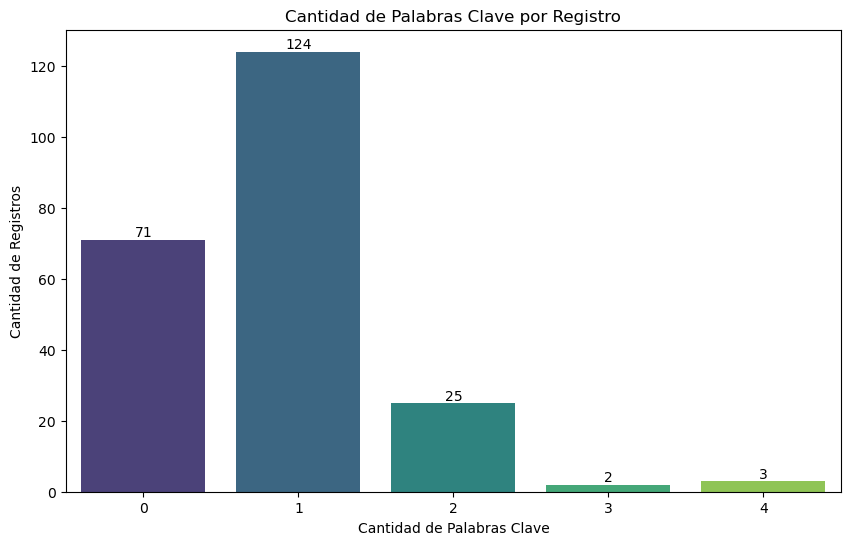

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras para la cantidad de palabras clave
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cantidad_palabras_clave', order=sorted(df['cantidad_palabras_clave'].unique()), palette='viridis')
plt.title('Cantidad de Palabras Clave por Registro')
for p in plt.gca().patches:
    plt.gca().annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=10, color='black'
    )
plt.xlabel('Cantidad de Palabras Clave')
plt.ylabel('Cantidad de Registros')
plt.show() 

In [19]:
categorías['categoría'] = categorías['categoría'].str.replace('abuso', 'ASI', regex=False)
categorías['categoría'] = categorías['categoría'].str.replace('pánico', 'ansiedad', regex=False)
categorías['categoría'] = categorías['categoría'].str.replace('ansiedad/pánico', 'ansiedad', regex=False)
categorías['categoría'] = categorías['categoría'].str.replace('asi', 'ASI', regex=False)
categorías['categoría'] = categorías['categoría'].str.replace('ansiedad/ansiedad', 'ansiedad', regex=False)
categorías['categoría'] = categorías['categoría'].str.replace('ansiedad/violencia/ideas de/esquizofrenia', 'esquizofrenia', regex=False)

In [20]:
categorías.head(24)

,categoría,cantidad
0,angustia,25
1,ansiedad,21
2,violencia,14
3,insomnio,11
4,duelo,9
5,autolesión,8
6,ASI,8
7,ansiedad,6
8,ansiedad/insomnio,5
9,tca,3


In [98]:
categorías.tail(24)

,categoría,cantidad
24,violencia/asi,1
25,obesidad,1
26,violencia/estrés,1
27,ideas de/consumo,1
28,violencia/encopresis,1
29,sobrecarga,1
30,depresión/encopresis,1
31,duelo/insomnio,1
32,bullying/ansiedad,1
33,ansiedad/duelo,1


In [21]:
categorías= categorías.groupby('categoría').sum().reset_index().sort_values(by='cantidad', ascending=False)

In [22]:
# Paso 1: separar las categorías múltiples en filas individuales
categorías_expandidas = (
    categorías
    .assign(categoría=categorías['categoría'].str.split('/'))  # convierte a lista
    .explode('categoría')                                      # cada categoría individual como fila
)

# Paso 2: agrupar y sumar las cantidades por categoría individual
categorías_agrupadas = (
    categorías_expandidas
    .groupby('categoría', as_index=False)['cantidad']
    .sum()
    .sort_values('cantidad', ascending=False)
)

In [23]:
categorías_agrupadas['categoría'] = categorías_agrupadas['categoría'].str.replace('ideas de', 'ideas de muerte', regex=False)
categorías_agrupadas['categoría'] = categorías_agrupadas['categoría'].str.replace('Asi', 'ASI', regex=False)
categorías_agrupadas['categoría'] = categorías_agrupadas['categoría'].str.replace('Tca', 'TCA', regex=False)

In [24]:
categorías_agrupadas['categoría'] = categorías_agrupadas['categoría'].str.capitalize()

In [25]:
categorías_agrupadas['categoría'] = categorías_agrupadas['categoría'].str.replace('Autolesión', 'Conductas autolesivas', regex=False)

C:\Users\primo\AppData\Local\Temp\ipykernel_3400\3371181666.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='cantidad', y='categoría', palette='viridis')


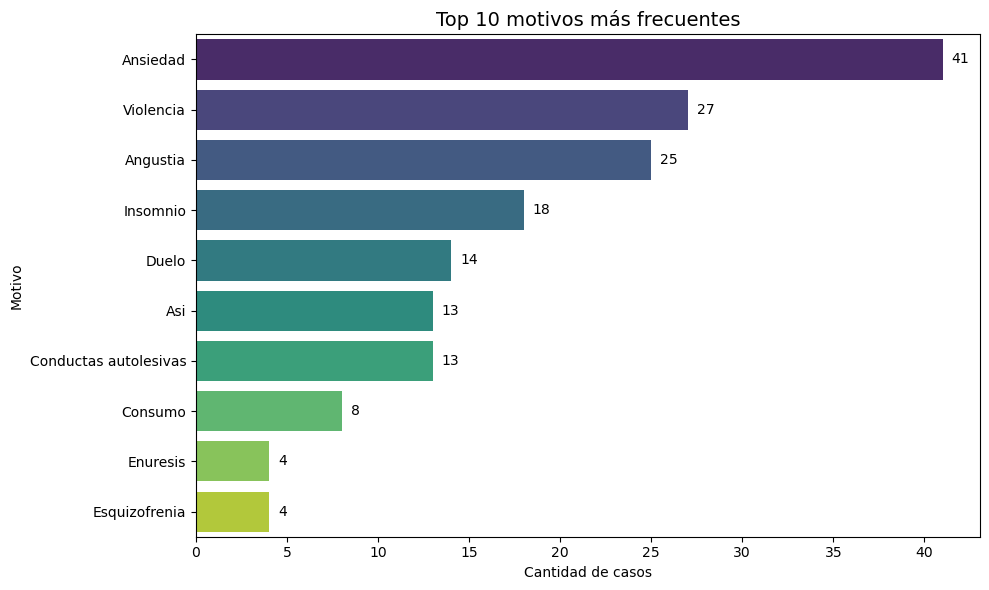

In [28]:
top_10 = categorías_agrupadas.sort_values('cantidad', ascending=False).head(10)

# Configurar el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, x='cantidad', y='categoría', palette='viridis')

# Títulos y etiquetas
plt.title('Top 10 motivos más frecuentes', fontsize=14)
plt.xlabel('Cantidad de casos')
plt.ylabel('Motivo')
plt.tight_layout()
for i, v in enumerate(top_10['cantidad']):
    plt.text(v + 0.5, i, str(v), va='center', fontsize=10)
plt.show()

In [134]:
categorías_agrupadas.to_excel(r"C:\Users\primo\Downloads\categorías_agrupadas.xlsx", index=False)